In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# Load data
p11_WT_colon_OTU = pd.read_csv('colon/Download (1)/data_normalized.csv',sep=',',index_col=0)
p11_WT_colon_grp = pd.read_csv('colon/Download (1)/NEC_Colon_C.csv',sep=',',index_col=0)
p11_WT_colon_OTU.head(5)

,071A,073A,075A,077A,081A,083A,085A,088A,091A,097A,...,220A,224A,226A,227A,228A,235A,242A,245A,246A,248A
Lactobacillus,6.661218e+06,6.577637e+06,8.277117e+06,5.792719e+06,8.258172e+06,7.528975e+06,6.882615e+06,6.618128e+06,2.167533e+06,6.769316e+06,...,3.157504e+04,6.437593e+05,5.044205e+06,4.116642e+06,4.330981e+06,6.014116e+06,5.044577e+05,1.183878e+06,1.011516e+06,8.867013e+05
Escherichia_Shigella,1.745914e+04,2.005944e+04,1.857355e+04,3.343239e+03,0.000000e+00,0.000000e+00,6.686478e+03,1.365156e+06,3.930535e+06,5.943536e+03,...,1.966196e+06,2.548663e+06,3.765230e+06,4.851412e+06,5.372585e+06,2.018574e+06,2.145245e+06,1.145245e+06,1.961367e+06,1.350669e+06
Muribacter,1.857355e+03,3.343239e+04,2.187964e+05,2.303120e+04,2.592868e+05,2.366270e+05,1.394131e+06,1.790490e+05,2.228826e+03,5.163447e+04,...,0.000000e+00,0.000000e+00,5.906389e+04,5.609212e+04,0.000000e+00,1.315007e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Staphylococcus,1.135958e+06,1.300149e+04,5.943536e+03,8.766716e+04,8.358098e+04,1.199851e+05,1.734770e+05,5.609212e+04,5.078009e+05,1.485884e+04,...,5.092868e+05,5.534918e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.943536e+03,1.727340e+05,2.466568e+05,4.528232e+05,1.987370e+05
Streptococcus,1.040119e+05,9.472511e+05,6.712481e+05,1.931649e+04,3.974740e+05,3.551263e+05,1.474740e+05,8.109212e+05,2.526003e+04,2.600297e+05,...,1.040119e+04,1.783061e+04,4.234770e+05,4.643388e+05,1.066122e+05,5.698366e+05,2.043091e+04,1.745914e+04,3.454681e+04,9.286776e+03


In [3]:
p11_WT_colon_grp.head(5)

,Experiment,Tissue type,DOL,Genotype
071A,NEC,colon,DOL11,Sig WT
077A,NEC,colon,DOL11,Sig WT
091A,NEC,colon,DOL11,Sig WT
093A,NEC,colon,DOL11,Sig WT
100A,NEC,colon,DOL11,Sig WT


In [4]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    # print(otus_data)
    # Extracting the numeric part using regular expressions and creating a new column
    # otus_data[condition] = otus_data[condition].apply(lambda x: int(re.search(r'\d+', x).group()))
    # print(otus_data)
    # Sorting the DataFrame based on the numeric part
    otus_data = otus_data.sort_values(by=condition)
    # otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(p11_WT_colon_OTU,p11_WT_colon_grp)
heatmap.head(10)

,106A,073A,075A,215A,081A,083A,085A,088A,226A,097A,...,071A,219A,218A,246A,101A,100A,091A,077A,220A,248A
Lactobacillus,8.452452e+06,6.577637e+06,8.277117e+06,1.854755e+06,8.258172e+06,7.528975e+06,6.882615e+06,6.618128e+06,5.044205e+06,6.769316e+06,...,6.661218e+06,1.745914e+04,2.202823e+05,1.011516e+06,2.348811e+06,1.229198e+06,2.167533e+06,5.792719e+06,3.157504e+04,8.867013e+05
Escherichia_Shigella,2.303120e+04,2.005944e+04,1.857355e+04,5.200594e+03,0.000000e+00,0.000000e+00,6.686478e+03,1.365156e+06,3.765230e+06,5.943536e+03,...,1.745914e+04,6.104383e+06,2.105498e+06,1.961367e+06,5.382987e+06,5.023774e+06,3.930535e+06,3.343239e+03,1.966196e+06,1.350669e+06
Muribacter,4.104755e+05,3.343239e+04,2.187964e+05,6.315007e+03,2.592868e+05,2.366270e+05,1.394131e+06,1.790490e+05,5.906389e+04,5.163447e+04,...,1.857355e+03,1.077266e+04,1.289004e+05,0.000000e+00,2.228826e+03,1.114413e+03,2.228826e+03,2.303120e+04,0.000000e+00,0.000000e+00
Staphylococcus,2.228826e+03,1.300149e+04,5.943536e+03,2.303120e+04,8.358098e+04,1.199851e+05,1.734770e+05,5.609212e+04,0.000000e+00,1.485884e+04,...,1.135958e+06,9.249629e+04,2.600297e+05,4.528232e+05,1.380015e+06,2.198737e+06,5.078009e+05,8.766716e+04,5.092868e+05,1.987370e+05
Streptococcus,5.761516e+05,9.472511e+05,6.712481e+05,1.125557e+05,3.974740e+05,3.551263e+05,1.474740e+05,8.109212e+05,4.234770e+05,2.600297e+05,...,1.040119e+05,3.343239e+03,1.151560e+04,3.454681e+04,3.714710e+03,1.485884e+04,2.526003e+04,1.931649e+04,1.040119e+04,9.286776e+03
Klebsiella,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.365527e+05,1.323923e+06,1.255201e+06,0.000000e+00,0.000000e+00,1.960253e+06,...,0.000000e+00,8.915305e+03,2.265973e+04,0.000000e+00,3.395245e+05,3.372957e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Enterococcus,1.158990e+05,4.186478e+05,7.503715e+04,5.869242e+04,9.286776e+03,9.472511e+04,3.826152e+04,2.526003e+04,4.457652e+04,1.523031e+04,...,2.038633e+06,2.643759e+06,8.766716e+04,3.789004e+05,4.725111e+05,9.810550e+05,2.408247e+06,2.271917e+06,2.726597e+05,1.790490e+05
Pseudomonas,1.077266e+04,2.228826e+03,5.572065e+03,0.000000e+00,2.600297e+03,0.000000e+00,1.077266e+04,1.188707e+04,0.000000e+00,1.114413e+03,...,3.974740e+04,4.457652e+03,1.597325e+04,1.114413e+03,4.457652e+03,4.829123e+03,1.411590e+04,1.114413e+04,0.000000e+00,0.000000e+00
Lachnospiraceae_NK4A136_group,1.140416e+05,4.086181e+03,1.448737e+04,1.393388e+06,1.894502e+04,1.188707e+04,0.000000e+00,6.946508e+04,3.343239e+03,9.881129e+04,...,0.000000e+00,1.151560e+04,4.256315e+06,5.404903e+05,5.906389e+04,1.341010e+05,3.855869e+05,1.820208e+04,2.803120e+06,6.764487e+05
Muribaculaceae,5.534918e+04,7.670877e+05,6.835067e+04,3.236256e+06,4.457652e+03,1.857355e+03,2.600297e+03,1.385587e+05,0.000000e+00,2.206538e+05,...,0.000000e+00,0.000000e+00,6.315007e+03,4.248514e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.244799e+06,0.000000e+00


In [5]:
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['cyan','purple','g','blue'])))
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(p11_WT_colon_grp)
# color_dict = {'P8': 'blue','P11': 'cyan', 'P14': 'purple', 'P28': 'g' }

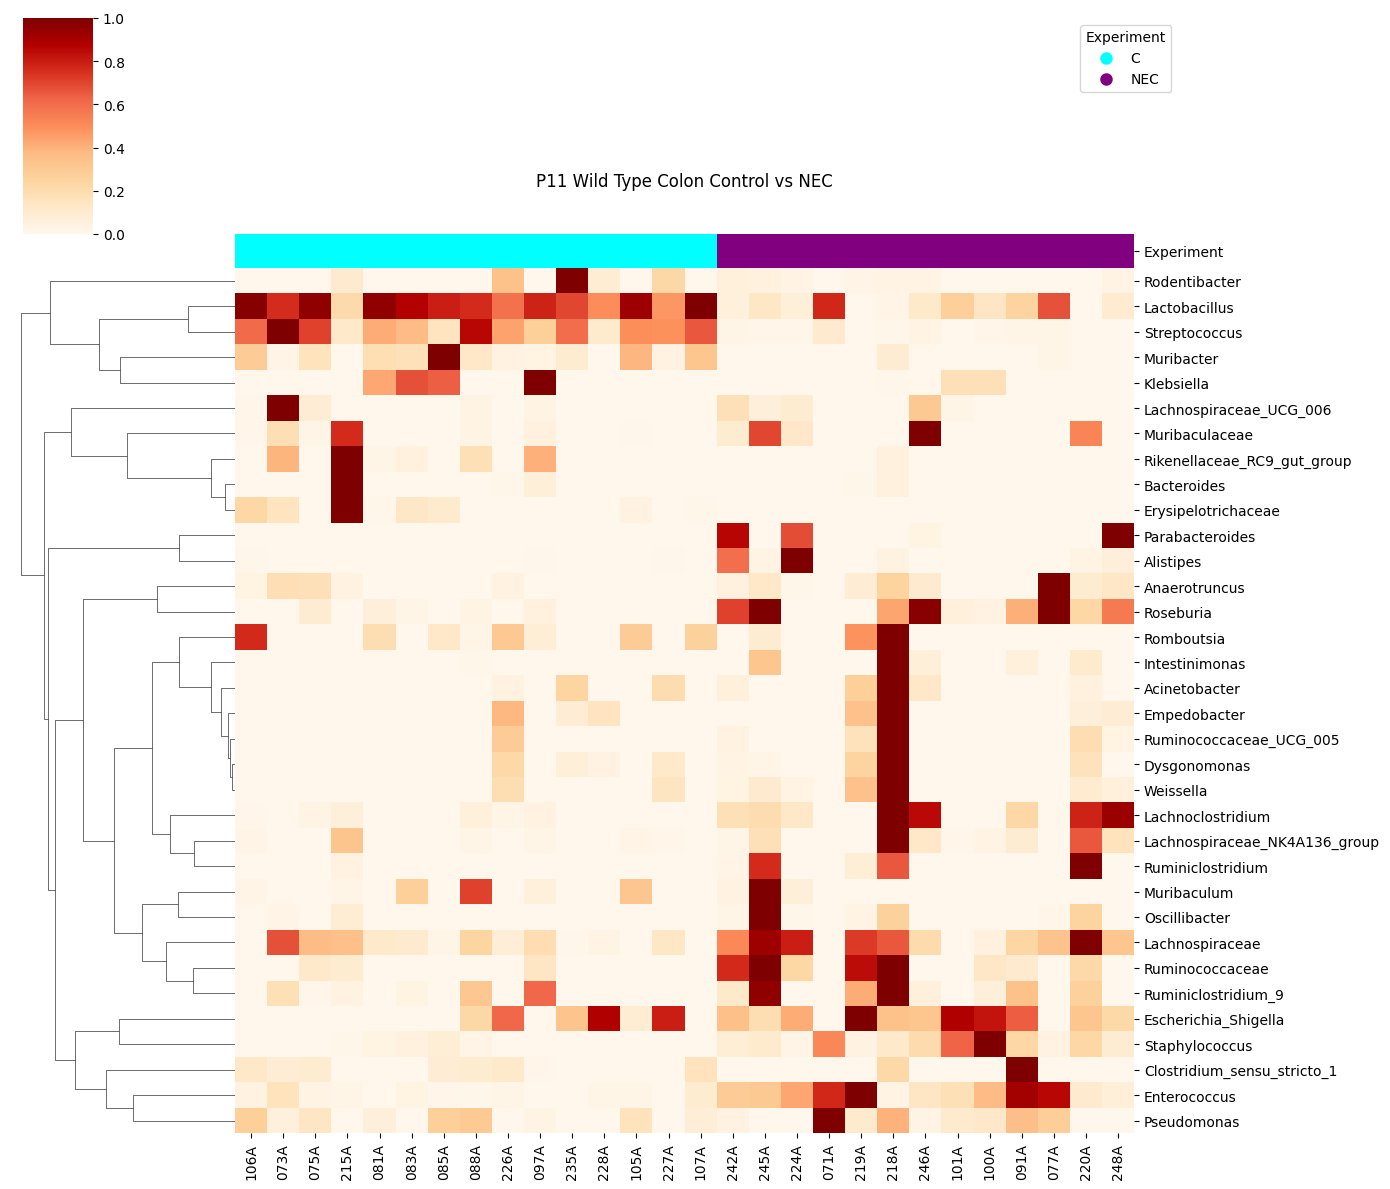

In [6]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P11 Wild Type Colon Control vs NEC"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)

In [31]:
# Load data
p11_WT_TI_OTU = pd.read_csv('ti/Download (2)/data_normalized.csv',sep=',',index_col=0)
p11_WT_TI_grp = pd.read_csv('ti/Download (2)/NEC_TI_C.csv',sep=',',index_col=0)
p11_WT_TI_OTU.head(5)

,071B,073B,075B,077B,081B,083B,085B,088B,091B,093B,...,220B,224B,226B,227B,228B,235B,242B,245B,246B,248B
Lactobacillus,4.118587e+06,5.716315e+06,7.846618e+06,1.865791e+06,6.958992e+06,4.727499e+06,6.946565e+06,8.176815e+06,1.105983e+06,1.917273e+05,...,1.437955e+05,1.420202e+05,2.032665e+06,2.126753e+06,4.468312e+06,2.700160e+06,4.455885e+05,1.793006e+05,142020.237884,3.923309e+05
Escherichia_Shigella,1.065152e+04,1.065152e+04,3.550506e+03,3.905557e+04,1.597728e+04,1.242677e+04,3.550506e+03,1.420202e+04,3.575359e+06,1.775253e+04,...,1.864016e+05,1.650985e+05,1.519617e+06,6.887982e+05,7.970886e+05,6.390911e+04,5.858335e+04,3.078289e+06,521924.374223,1.633233e+05
Muribacter,1.065152e+05,2.013137e+06,1.693591e+06,1.633233e+05,2.456950e+06,4.509143e+06,2.700160e+06,7.385052e+05,1.189419e+05,1.881768e+05,...,1.184094e+06,1.358069e+06,1.232026e+06,3.126220e+06,2.258122e+06,1.466359e+06,0.000000e+00,4.438132e+04,468666.785017,3.461743e+05
Staphylococcus,2.783597e+06,2.307829e+04,3.550506e+03,1.832061e+06,1.242677e+04,7.811113e+04,5.325759e+04,1.597728e+04,2.377064e+06,7.141843e+06,...,1.054500e+06,2.758743e+06,9.763891e+04,4.615658e+04,2.130304e+04,1.420202e+05,1.441505e+06,2.077046e+06,628439.552636,2.078821e+06
Streptococcus,2.236819e+05,1.336765e+06,1.473460e+05,4.118587e+05,6.035860e+04,7.633588e+04,4.083082e+04,6.231138e+05,3.035683e+05,4.562400e+05,...,9.408841e+04,1.349192e+05,2.538612e+05,7.030002e+05,3.994319e+05,4.970708e+04,1.597728e+05,1.260430e+05,0.000000,1.846263e+05


In [32]:
p11_WT_TI_grp.head(5)

,Experiment,Tissue type,DOL,Genotype
071B,NEC,TI,DOL 11,Sig WT
077B,NEC,TI,DOL 11,Sig WT
091B,NEC,TI,DOL 11,Sig WT
093B,NEC,TI,DOL 11,Sig WT
100B,NEC,TI,DOL 11,Sig WT


In [33]:
def create_heatmap(otus_data,metadata,condition ="Experiment" ):
    heatmap = otus_data
    otus_data = otus_data.transpose()
    new_column = []
    new_idx = []
    for index1 in otus_data.index:
        new_idx.append(str(index1))
    otus_data.index = new_idx
    # print(otus_data)
    for index1 in otus_data.index:
        for index2 in metadata.index:
            value = metadata.loc[index2, condition]
            if str(index1) == str(index2):
                new_column.append(value)
    otus_data[condition] = new_column
    otus_data = otus_data.sort_values(by=condition)
    # print(otus_data)
    heatmap = otus_data.drop(columns=[condition])
    heatmap = heatmap.transpose()
    return heatmap
heatmap = create_heatmap(p11_WT_TI_OTU,p11_WT_TI_grp)
heatmap.head(10)

,106B,215B,107B,226B,105B,227B,228B,097B,235B,088B,...,071B,218B,246B,101B,100B,093B,091B,077B,219B,248B
Lactobacillus,3.259364e+06,2.009586e+06,8.501686e+06,2.032665e+06,8.270904e+06,2.126753e+06,4.468312e+06,6.584413e+06,2.700160e+06,8.176815e+06,...,4.118587e+06,2.574117e+05,142020.237884,1.125510e+06,8.325936e+05,1.917273e+05,1.105983e+06,1.865791e+06,8.876265e+03,3.923309e+05
Escherichia_Shigella,2.130304e+04,6.213385e+04,7.101012e+03,1.519617e+06,1.242677e+04,6.887982e+05,7.970886e+05,0.000000e+00,6.390911e+04,1.420202e+04,...,1.065152e+04,1.313687e+05,521924.374223,6.071365e+05,8.876265e+03,1.775253e+04,3.575359e+06,3.905557e+04,4.535771e+06,1.633233e+05
Muribacter,4.928102e+06,1.063377e+06,1.059826e+06,1.232026e+06,1.301260e+06,3.126220e+06,2.258122e+06,6.870229e+05,1.466359e+06,7.385052e+05,...,1.065152e+05,4.757678e+05,468666.785017,0.000000e+00,2.449849e+05,1.881768e+05,1.189419e+05,1.633233e+05,1.034972e+06,3.461743e+05
Staphylococcus,0.000000e+00,9.586366e+04,0.000000e+00,9.763891e+04,3.550506e+03,4.615658e+04,2.130304e+04,5.858335e+04,1.420202e+05,1.597728e+04,...,2.783597e+06,4.754127e+06,628439.552636,4.542872e+06,8.377419e+06,7.141843e+06,2.377064e+06,1.832061e+06,2.396592e+06,2.078821e+06
Streptococcus,5.183739e+05,2.343334e+05,1.224925e+05,2.538612e+05,2.077046e+05,7.030002e+05,3.994319e+05,8.521214e+04,4.970708e+04,6.231138e+05,...,2.236819e+05,1.189419e+05,0.000000,7.172022e+05,1.384697e+05,4.562400e+05,3.035683e+05,4.118587e+05,1.047399e+05,1.846263e+05
Klebsiella,0.000000e+00,8.343689e+04,0.000000e+00,1.952778e+04,3.550506e+03,4.615658e+04,3.728031e+04,2.519084e+06,5.503284e+04,0.000000e+00,...,0.000000e+00,3.017930e+04,71010.118942,2.006036e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.325759e+03,5.503284e+04
Enterococcus,0.000000e+00,2.840405e+04,0.000000e+00,2.662879e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.970708e+04,0.000000e+00,...,1.150364e+06,2.059293e+05,101189.419492,1.633233e+05,0.000000e+00,5.130481e+05,5.716315e+05,2.875910e+05,7.012249e+05,3.124445e+05
Pseudomonas,3.657021e+05,3.550506e+05,1.153914e+05,2.254571e+05,1.047399e+05,2.858157e+05,2.591869e+05,3.017930e+04,5.165986e+05,1.384697e+05,...,4.331617e+05,2.148056e+05,600035.505059,1.022546e+06,2.201314e+05,4.225102e+05,3.035683e+05,2.231493e+06,6.745961e+04,4.207350e+05
Lachnospiraceae_NK4A136_group,0.000000e+00,2.840405e+04,0.000000e+00,2.485354e+04,0.000000e+00,1.242677e+04,0.000000e+00,0.000000e+00,7.101012e+04,0.000000e+00,...,0.000000e+00,0.000000e+00,47931.830286,0.000000e+00,0.000000e+00,1.420202e+04,0.000000e+00,0.000000e+00,0.000000e+00,7.811113e+04
Muribaculaceae,0.000000e+00,8.876265e+03,7.101012e+03,2.485354e+04,0.000000e+00,0.000000e+00,7.101012e+03,0.000000e+00,1.242677e+04,0.000000e+00,...,0.000000e+00,1.952778e+04,31954.553524,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.615658e+04,0.000000e+00,3.017930e+04


In [34]:
def colordict(metadata,condition ='Experiment' ):
    color_dict=dict(zip(np.unique(metadata[condition]),np.array(['cyan','purple','g','blue'])))
    row_colors = metadata[condition].map(color_dict)
    return color_dict,row_colors
color_dict,row_colors = colordict(p11_WT_TI_grp)
color_dict

{'C': 'cyan', 'NEC': 'purple'}

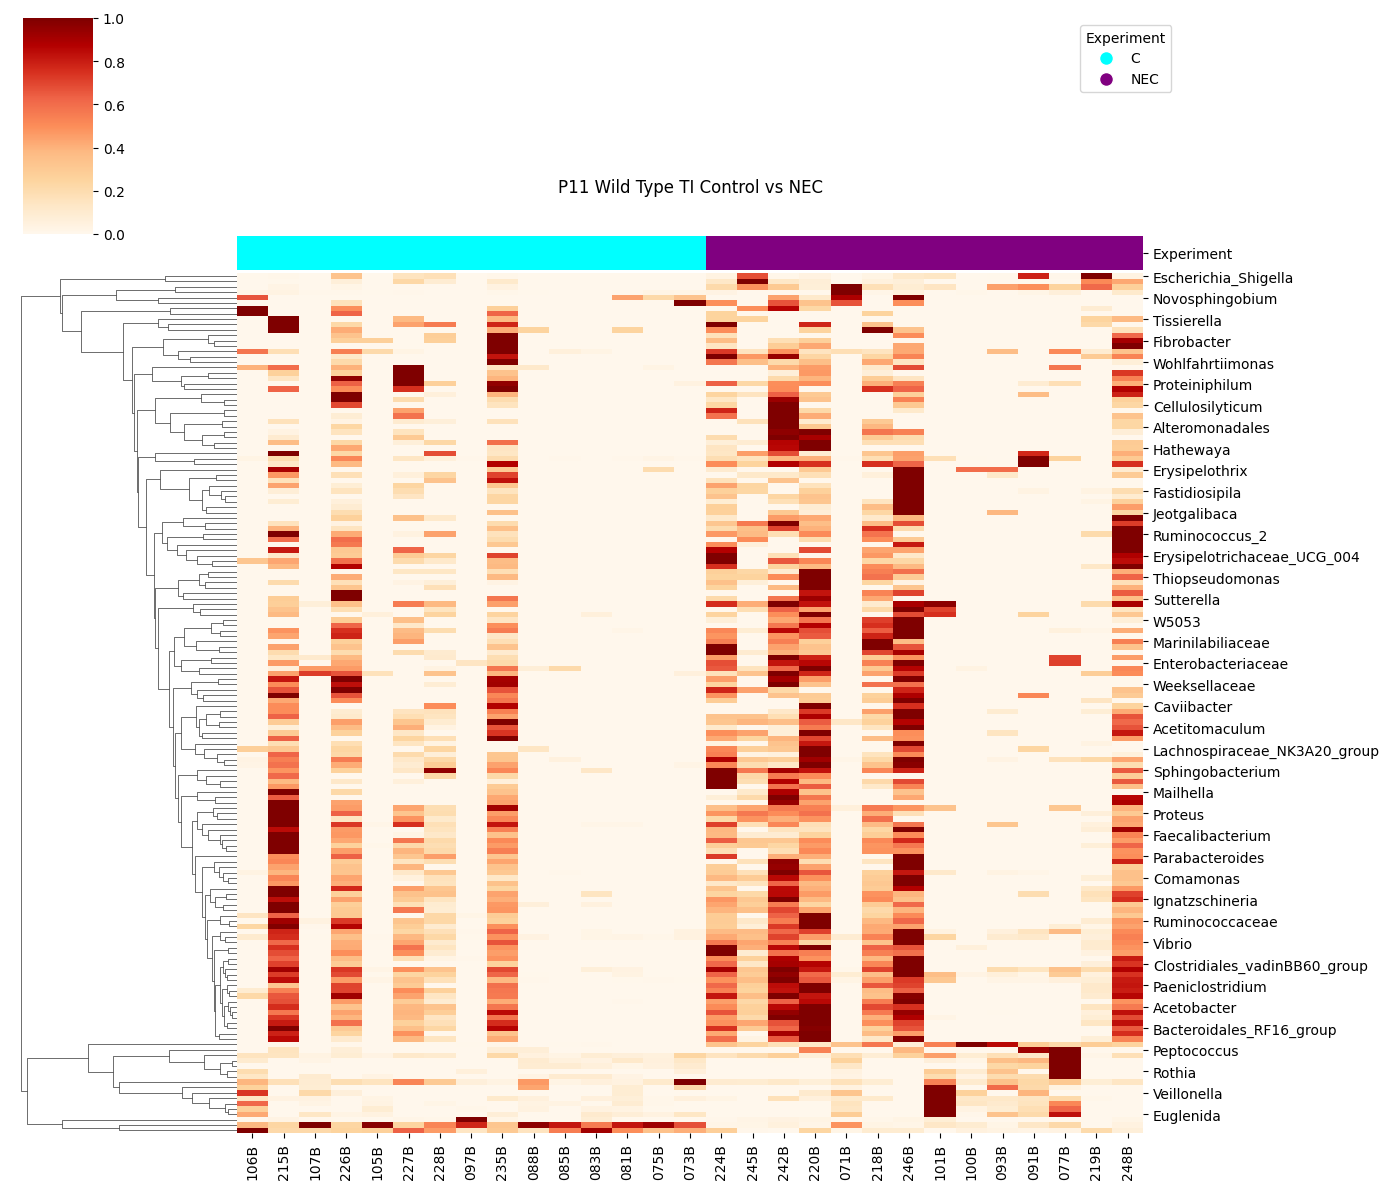

In [40]:
def plot_cluster_heatmap(heatmap,color_dict,row_colors,title):
    custom_cmap = sns.color_palette("OrRd", as_cmap=True)
    hm = sns.clustermap(heatmap,
                metric="correlation",
                standard_scale=0,
                z_score=None,
                col_colors=row_colors,
                col_cluster=False,
                cmap=custom_cmap,
                # cbar_pos=(0, .2, .03, .4),
                figsize=(14, 12))
    # Create a color legend using the color_dict
    legend_labels = [f"{experiment}" for experiment, color in color_dict.items()]
    legend_colors = [color for _, color in color_dict.items()]
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels, legend_colors)]
    plt.legend(handles=legend_handles, title="Experiment", bbox_to_anchor=(15, 1), loc='upper left')
    # Add a title to the center of the heatmap
    ax  = hm.ax_heatmap
    ax.text(0.5, 1.1, title, fontsize=12, ha="center", va="center", transform=ax.transAxes)
    # Get the current Axes objects
    ax_row_labels = hm.ax_row_dendrogram
    ax_col_labels = hm.ax_col_dendrogram

    # Set row and column labels font size
    row_font_size = 4
    col_font_size = 4

    for label in ax_row_labels.get_yticklabels():
        label.set_fontsize(row_font_size)

    for label in ax_col_labels.get_xticklabels():
        label.set_fontsize(col_font_size)

    # Display the plot
    plt.show()
title = "P11 Wild Type TI Control vs NEC"
plot_cluster_heatmap(heatmap,color_dict,row_colors,title)